In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv("./hs_chars.csv")

In [44]:
X = df[["Number", "Cost", "Life", "Move", "Range", "Attack", "Defense"]]

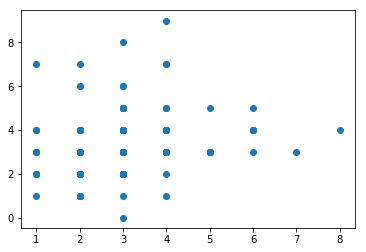

In [110]:
plt.scatter(X[:, 5], X[:, 6])

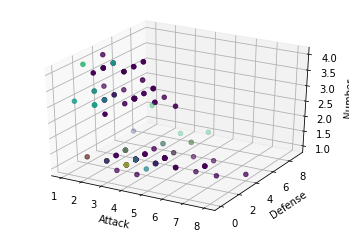

In [112]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 5], X[:, 6], X[:, 0], c = X[:, 4])

ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('Number')

plt.show()

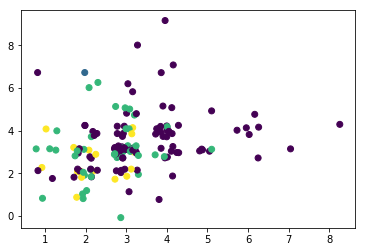

In [126]:
np.random.seed(1337)
plt.scatter(X[:, 5] + np.random.uniform(-0.3, 0.3, size = X.shape[0]), X[:, 6]+ np.random.uniform(-0.3, 0.3, size = X.shape[0]), c = X[:, 0], alpha = 1)

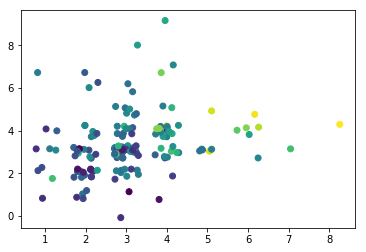

In [127]:
np.random.seed(1337)
plt.scatter(X[:, 5] + np.random.uniform(-0.3, 0.3, size = X.shape[0]), X[:, 6]+ np.random.uniform(-0.3, 0.3, size = X.shape[0]), c = X[:, 1], alpha = 1)

In [ ]:
plt.scatter(X[:, 5] + np.random.uniform(-0.3, 0.3, size = X.shape[0]), X[:, 6]+ np.random.uniform(-0.3, 0.3, size = X.shape[0]), c = X[:, 0], alpha = 1)

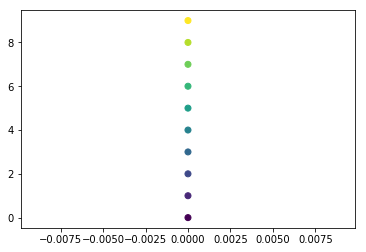

In [122]:
plt.scatter([0 for _ in range(10)], range(10), c = range(10))

In [45]:
X = X.values

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler(with_mean = True, with_std = True)

In [48]:
scaler.fit(X)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
X_trans = scaler.transform(X)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA()

In [53]:
X_pca = pca.fit_transform(X_trans)

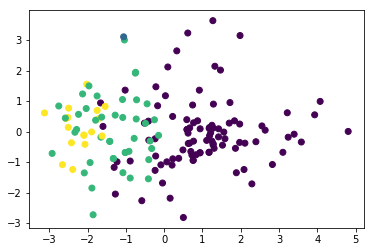

In [70]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = X[:, 0])

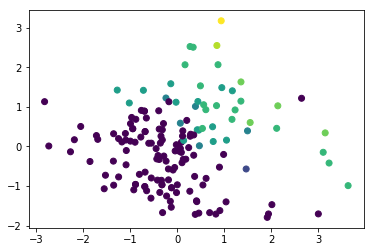

In [80]:
plt.scatter(X_pca[:, 1], X_pca[:, 2], c = X[:, 4])

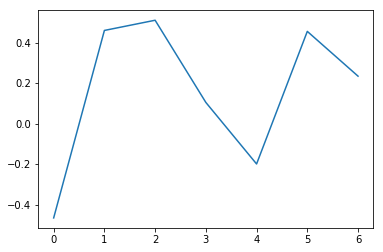

In [62]:
plt.plot(pca.components_[0])

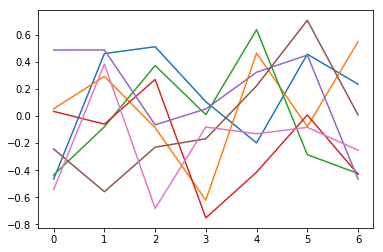

In [55]:
plt.plot(pca.components_.T)

(0, 1)

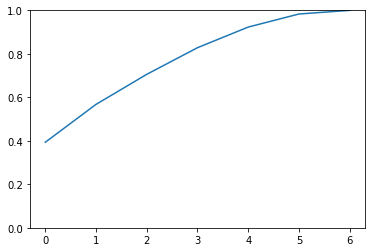

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0, 1])

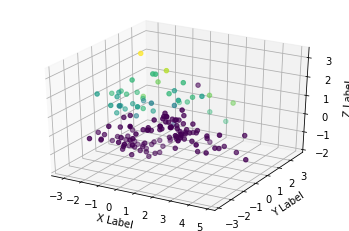

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = X[:, 4])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [82]:
from sklearn.metrics import pairwise_distances

In [83]:
affin_mat = pairwise_distances(X_trans)

In [84]:
affin_mat.shape

(156, 156)

In [85]:
X_trans.shape

(156, 7)

In [108]:
from sklearn.cluster import SpectralClustering

spec_cluster = SpectralClustering(n_clusters = 7)
predicted = spec_cluster.fit_predict(X_trans)

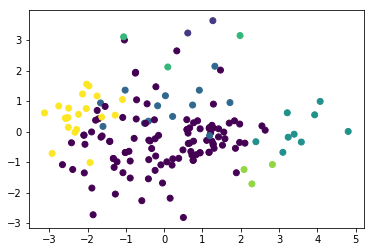

In [109]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = predicted)

In [101]:
from sklearn.cluster import KMeans

In [102]:
iner_list = []

for n_clusters in range(2, 25):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(X_trans)
    iner_list.append(kmeans.inertia_)

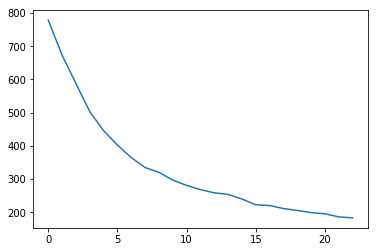

In [103]:
plt.plot(iner_list)